In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Download the Fisher iris data (in both CSV and XLSX form) from the course data repository at https://github.com/thomaspingel/geodata and save it to the folder that you're working in now.

# Loading Data

In [2]:
# CSV files are easy to read:
    
df = pd.read_csv('data/fisher_iris_data.csv')

In [3]:
# Excel files are also easy to read. 

df = pd.read_excel('data/fisher_iris_data.xlsx')

In [4]:
# Pandas can read things data from URLs, too, without needing to separately download:

url = 'https://raw.githubusercontent.com/thomaspingel/geodata/master/fisher_iris_data.csv'
df = pd.read_csv(url)

# Inspecting Data

Probably the single most important thing you can do with your data after you load it is to look at it!

Maybe even load it in a text editor before you get this far, since many programs will have tried to interpret the data before they show it to you.  Excel, ArcGIS Pro, and even Pandas will do things like try to figure out what your data types are when in reads in a table.

In [5]:
# Head shows the first five lines by default

df.head()

,species,petal_width,petal_length,sepal_width,sepal_length
0,setosa,2,14,33,50
1,setosa,2,10,36,46
2,setosa,2,16,31,48
3,setosa,1,14,36,49
4,setosa,2,13,32,44


In [6]:
# But you can ask for more or fewer:

df.head(3)

,species,petal_width,petal_length,sepal_width,sepal_length
0,setosa,2,14,33,50
1,setosa,2,10,36,46
2,setosa,2,16,31,48


In [7]:
# Tail does the same thing, but for the end.

df.tail()

,species,petal_width,petal_length,sepal_width,sepal_length
145,virginica,18,63,29,73
146,virginica,22,58,30,65
147,virginica,19,53,27,64
148,virginica,20,50,25,57
149,virginica,24,51,28,58


# Simple Plotting Using Matplotlib

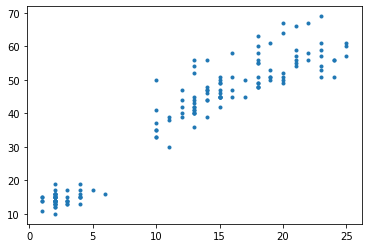

In [8]:
# A simple scatterplot

plt.plot(df.petal_width,df.petal_length,'.')

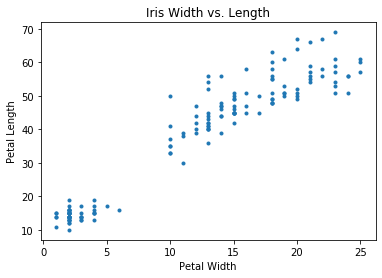

In [9]:
# Labeling

plt.plot(df.petal_width,df.petal_length,'.')
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.title('Iris Width vs. Length')
plt.savefig('out/iris_width_vs_length.png',dpi=300)

### Specifying the appearance with linespec

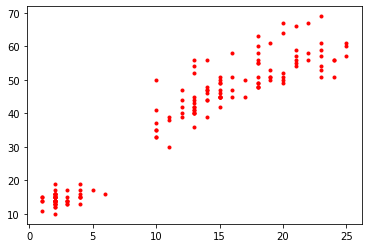

In [10]:
# Plot is very powerful.  The appearance is called linespec, and mirrors Matlab's syntax
# See: http://www.mathworks.com/help/matlab/ref/linespec.html

# We can add colors this way by adding a letter before the dot. r is red, b is blue, etc.
# There are only a few colors, but enough to differentiate most data.

plt.plot(df.petal_width,df.petal_length,'r.')

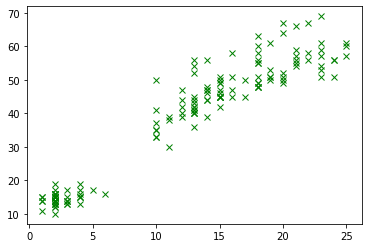

In [11]:
# We can draw other things too, like Exes and Ohs

plt.plot(df.petal_width,df.petal_length,'gx')

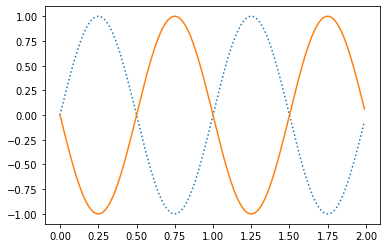

In [12]:
# If we need to draw lines, we can do that too.  
# The default is a solid lines, but we can do dashes, dots, and more.
# Notice that it will change the colors automatically, if you don't specify.

t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2 * np.pi * t)
s2 = -np.sin(2 * np.pi * t)
plt.plot(t, s,':')
plt.plot(t, s2,'-')

### Histograms

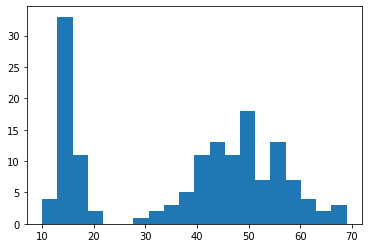

In [13]:
# Plotting histograms.  Here, the annoying extra information is being captured using a garbage
# or throwaway variable (the underscore)

_ = plt.hist(df.petal_length,bins=20)

### Pandas Plotting

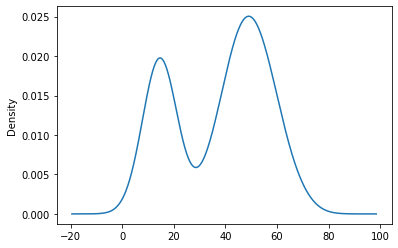

In [14]:
# Pandas has its own plotting library.  One of my favorites is KDE, or kernel density estimation.  
# KDE is like a histogram, but better.

df['petal_length'].plot.kde()

### Saving Plots

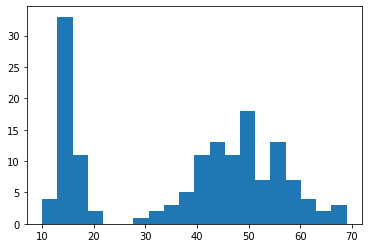

In [15]:
# When saving, it's easiest to put the savefig command in the same codeblock you use to make the plot

_ = plt.hist(df.petal_length,bins=20)
plt.savefig('out/histogram.png',dpi=300)

### Subplots

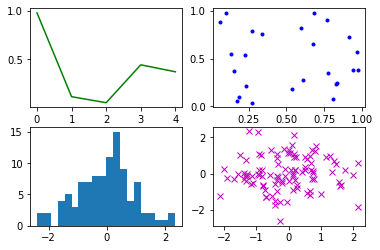

In [16]:
# Subplots work by specifying how many rows and columns you want in the subplot, and then filling them in by number
# 1 to n, from left-to-right, top-to-bottom

plt.subplot(2,2,1)
plt.plot(np.random.rand(5),'g-')
plt.subplot(2,2,2)
plt.plot(np.random.rand(25),np.random.rand(25),'b.')
plt.subplot(2,2,3)
_ = plt.hist(np.random.randn(100),bins=20)
plt.subplot(2,2,4)
plt.plot(np.random.randn(100),np.random.randn(100),'mx')

# Descriptive Statistics

In [17]:
# Getting many summary statistics easily for each column

df.describe()

,petal_width,petal_length,sepal_width,sepal_length
count,150.000000,150.000000,150.000000,150.000000
mean,11.926667,37.786667,30.553333,58.446667
std,7.569008,17.776233,4.372791,8.268592
min,1.000000,10.000000,20.000000,43.000000
25%,3.000000,16.000000,28.000000,51.000000
50%,13.000000,44.000000,30.000000,58.000000
75%,18.000000,51.000000,33.000000,64.000000
max,25.000000,69.000000,44.000000,79.000000


In [18]:
# Getting particular statistics using numpy functions

np.mean(df.petal_width)

11.926666666666666

In [19]:
# With percentiles, you can ask for many at one time.  Here I ask for the 5th and 95th percentiles.

np.percentile(df.sepal_width,[5,95])

array([23.45, 38.  ])

In [20]:
# If data are missing (nan values) we need to explicitly ask for these to be excluded.

np.nanstd(df.sepal_length)

8.2409842993554

In [21]:
# Getting unique values

np.unique(df.species)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

# Sorting data

In [22]:
# Use .sort_values on your dataframe to sort by a column.

df = df.sort_values(by='petal_width')
df.head()

,species,petal_width,petal_length,sepal_width,sepal_length
20,setosa,1,11,30,43
23,setosa,1,15,41,52
3,setosa,1,14,36,49
13,setosa,1,14,30,48
28,setosa,1,15,31,49


In [23]:
# You can sort by more than one column by providing a list of columns, in case there are ties. Use as many columns
# as you want.

df = df.sort_values(by=['petal_width','petal_length'])
df.head()

,species,petal_width,petal_length,sepal_width,sepal_length
20,setosa,1,11,30,43
3,setosa,1,14,36,49
13,setosa,1,14,30,48
23,setosa,1,15,41,52
28,setosa,1,15,31,49


# Selecting data

In [24]:
# Selection looks like this:

df[df.species=='setosa']

,species,petal_width,petal_length,sepal_width,sepal_length
20,setosa,1,11,30,43
3,setosa,1,14,36,49
13,setosa,1,14,30,48
23,setosa,1,15,41,52
28,setosa,1,15,31,49
1,setosa,2,10,36,46
40,setosa,2,12,40,58
19,setosa,2,12,32,50
26,setosa,2,13,32,47
4,setosa,2,13,32,44


In [25]:
# And we might use it like this:

np.mean(df[df.species=='setosa'])

petal_width      2.46
petal_length    14.62
sepal_width     34.28
sepal_length    50.10
dtype: float64

In [26]:
# We can select columns like this

np.mean(df['petal_width'])

11.926666666666666

In [27]:
# Or by row number

df.iloc[5]

species         setosa
petal_width          2
petal_length        10
sepal_width         36
sepal_length        46
Name: 1, dtype: object

In [28]:
# Or a range of numbers, using standard numpy selections where colons specify ranges of values
# Remember, Python starts counting from ZERO, and ranges go up to BUT NOT INCLUDING the last value

df[2:4]

,species,petal_width,petal_length,sepal_width,sepal_length
13,setosa,1,14,30,48
23,setosa,1,15,41,52


In [29]:
# If you omit a number before or after the colon, you go form the beginning or end respectively:

df[:7]

,species,petal_width,petal_length,sepal_width,sepal_length
20,setosa,1,11,30,43
3,setosa,1,14,36,49
13,setosa,1,14,30,48
23,setosa,1,15,41,52
28,setosa,1,15,31,49
1,setosa,2,10,36,46
40,setosa,2,12,40,58


In [30]:
# And like numpy, you can use negative numbers to count from the back/bottom.  But if you do, remember to use the ILOC selector

df.iloc[-5:]

,species,petal_width,petal_length,sepal_width,sepal_length
100,virginica,24,56,31,67
139,virginica,24,56,34,63
121,virginica,25,57,33,67
130,virginica,25,60,33,63
115,virginica,25,61,36,72


### .loc and .iloc

In [31]:
# .loc is used to reference from INDEX values (in the above code, the 145, 146, etc., on the left side of the dataframe)

# The differences aren't obvious unless the row order is different than the index order, so we'll sort first
df = df.sort_values(by='sepal_width')

# Since .iloc is by rows, starting from the beginning looks a lot like .head
df.iloc[:5]

,species,petal_width,petal_length,sepal_width,sepal_length
77,versicolor,10,35,20,50
67,versicolor,15,45,22,62
110,virginica,15,50,22,60
79,versicolor,10,50,22,60
31,setosa,3,13,23,45


### Selecting columns by integer value with .iloc

In [32]:
# We can also select columns this way.  Here, we'll use a two part selector rows and columns

# Rows zero to five, columns 0 to 2 (again, UP TO BUT NOT INCLUDING the terminal value)
df.iloc[0:5,0:2]

,species,petal_width
77,versicolor,10
67,versicolor,15
110,virginica,15
79,versicolor,10
31,setosa,3


### .loc for boolean selection and selection by name

In [33]:
# .loc uses named values, and is used when doing boolean selection (==, <, >, etc.)

df.loc[df.index<5]

,species,petal_width,petal_length,sepal_width,sepal_length
2,setosa,2,16,31,48
4,setosa,2,13,32,44
0,setosa,2,14,33,50
3,setosa,1,14,36,49
1,setosa,2,10,36,46


In [34]:
# Selection by multiple columns is done with .loc

# All rows, but only columns sepal_length and petal_width
df.loc[:,['sepal_length','petal_width']]

,sepal_length,petal_width
77,50,10
67,62,15
110,60,15
79,60,10
31,45,3
...,...,...
25,54,4
40,58,2
23,52,1
11,55,2


### Multiple selection

In [35]:
# When selecting on multiple selection criteria, they must be wrapped in parentheses

idx = (df.species=='setosa') & (df.petal_width > 3)
np.sum(idx)

9

# Counting

In [36]:
# Or we could count the number of items that matched our query this way, since "False" is counted as zero, and "True" is 
# counted as 1.

np.sum(df.species=='setosa')

50

In [37]:
# How many have a sepal length less than 50?

np.sum(df.sepal_length < 50)

22

In [38]:
# Queries can be saved to a variable, and then used

idx = df.petal_length > 20
np.mean(df.loc[idx,'petal_length'])

49.37

# Grouping

One of the more powerful features of Pandas is grouping, which acts like Pivot Tables in Excel.

In [39]:
# We make our groups using the dataframe.groupby syntax, and then can use it to calculate 
# descriptive statistics on our variables.

groups = df.groupby(by='species')
groups.mean()

,petal_width,petal_length,sepal_width,sepal_length
species,,,,
setosa,2.46,14.62,34.28,50.10
versicolor,13.26,43.22,27.64,59.36
virginica,20.06,55.52,29.74,65.88


In [40]:
# We ask for specific columns like this

groups = df.groupby(by='species')
means = groups['petal_length'].mean()
means

species
setosa        14.62
versicolor    43.22
virginica     55.52
Name: petal_length, dtype: float64

Text(0, 0.5, 'Mean Petal Length')

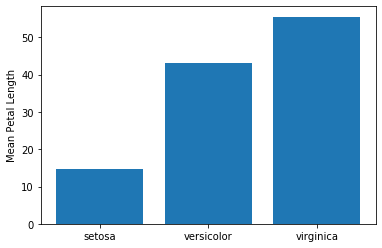

In [41]:
# And can make bar plots, too.

groups = df.groupby(by='species')
means = groups['petal_length'].mean()
plt.bar(means.index,means)
plt.ylabel('Mean Petal Length')

# Adding and Deleting Rows and Columns

### Calculating (Adding Fields)

In [42]:
# Calculating fields is easy!  Remember that although we can access fields using dots.and_fields or brackets['and_strings']
# we have to use the brackets when we make a new column

df['leaf_thinness'] = df.petal_length / df.petal_width
df.head()

,species,petal_width,petal_length,sepal_width,sepal_length,leaf_thinness
77,versicolor,10,35,20,50,3.500000
67,versicolor,15,45,22,62,3.000000
110,virginica,15,50,22,60,3.333333
79,versicolor,10,50,22,60,5.000000
31,setosa,3,13,23,45,4.333333


In [43]:
# We can also add a constant value

df['new_field'] = 5
df.head()

,species,petal_width,petal_length,sepal_width,sepal_length,leaf_thinness,new_field
77,versicolor,10,35,20,50,3.500000,5
67,versicolor,15,45,22,62,3.000000,5
110,virginica,15,50,22,60,3.333333,5
79,versicolor,10,50,22,60,5.000000,5
31,setosa,3,13,23,45,4.333333,5


In [44]:
# Or use numpy arrays, if they are of the same length as our dataframe

n = len(df)
df['new_field'] = np.random.randn(n)
df.head()

,species,petal_width,petal_length,sepal_width,sepal_length,leaf_thinness,new_field
77,versicolor,10,35,20,50,3.500000,0.093503
67,versicolor,15,45,22,62,3.000000,2.221267
110,virginica,15,50,22,60,3.333333,1.518381
79,versicolor,10,50,22,60,5.000000,-1.269732
31,setosa,3,13,23,45,4.333333,1.042877


### Deleting Columns

In [45]:
# Deleting columns is done with drop.  You can also specify multiple columns to drop using a list of columns

df = df.drop(columns='new_field')
df.head()

,species,petal_width,petal_length,sepal_width,sepal_length,leaf_thinness
77,versicolor,10,35,20,50,3.500000
67,versicolor,15,45,22,62,3.000000
110,virginica,15,50,22,60,3.333333
79,versicolor,10,50,22,60,5.000000
31,setosa,3,13,23,45,4.333333


In [46]:
# If you have a lot of columns to drop, you can "keep" columns instead using selection:

df = df.loc[:,['species','petal_width','petal_length','sepal_width','sepal_length']]
df.head()

,species,petal_width,petal_length,sepal_width,sepal_length
77,versicolor,10,35,20,50
67,versicolor,15,45,22,62
110,virginica,15,50,22,60
79,versicolor,10,50,22,60
31,setosa,3,13,23,45


### Deleting Rows

In [47]:
# You can delete rows with drop as well by specifying a list of indices to drop

# Reload the data
df = pd.read_csv('data/fisher_iris_data.csv')
df = df.drop([0,1])
df.head()

,species,petal_width,petal_length,sepal_width,sepal_length
2,setosa,2,16,31,48
3,setosa,1,14,36,49
4,setosa,2,13,32,44
5,setosa,2,16,38,51
6,setosa,2,16,30,50


In [48]:
# Or use .loc with a boolean selector.  Note the odd syntax!

df = pd.read_csv('data/fisher_iris_data.csv')
idx = df.species == 'setosa'

df = df.drop(df[idx].index)
df.head()

,species,petal_width,petal_length,sepal_width,sepal_length
50,versicolor,13,45,28,57
51,versicolor,16,47,33,63
52,versicolor,14,47,32,70
53,versicolor,12,40,26,58
54,versicolor,10,33,23,50


In [49]:
# An easier way is to "keep" rows that satisfy the inverse of the condition you want to drop

df = pd.read_csv('data/fisher_iris_data.csv')
idx = df.species!='setosa'
df = df[idx]
df.head()

,species,petal_width,petal_length,sepal_width,sepal_length
50,versicolor,13,45,28,57
51,versicolor,16,47,33,63
52,versicolor,14,47,32,70
53,versicolor,12,40,26,58
54,versicolor,10,33,23,50


### Adding Rows

In [50]:
# Adding data is done with append.  If not all columns are present, it will assign null values.

df = pd.read_csv('data/fisher_iris_data.csv')
print('The original data had',len(df),'rows.')

df2 = pd.read_excel('data/fisher_iris_data.xlsx')

# Adding a copy of the data... these could have been real data from another source.
df = df.append(df2)

print('The new data has',len(df),'rows.')

The original data had 150 rows.
The new data has 300 rows.


In [51]:
df = pd.read_csv('data/fisher_iris_data.csv')
df2 = pd.read_excel('data/fisher_iris_data.xlsx')

# You can also append more than one dataframe at a time, using a list
df = df.append([df2,df,df2])

print('Now there are',len(df),'rows.')

Now there are 600 rows.


In [52]:
# Another way to do this is by using the .concat command, this time attached to pandas (pd) not a dataframe

df1 = pd.read_csv('data/fisher_iris_data.csv')
df2 = pd.read_excel('data/fisher_iris_data.xlsx')

df = pd.concat([df1,df2])

print('Now there are',len(df),'rows.')

Now there are 300 rows.


## Joining Data

In many cases for data analysis, we're pulling in data from multiple sources

In [53]:
url = 'https://raw.githubusercontent.com/thomaspingel/geodata/master/election/state_election_data_1976-2016.csv'
election_df = pd.read_csv(url)
election_df.head()

,state,state_po,state_fips,gop_1976_votes,dem_1976_votes,totalvotes_1976,gop_1976_prc,dem_1976_prc,gop_minus_dem_prc_1976,gop_1980_votes,...,totalvotes_2012,gop_2012_prc,dem_2012_prc,gop_minus_dem_prc_2012,gop_2016_votes,dem_2016_votes,totalvotes_2016,gop_2016_prc,dem_2016_prc,gop_minus_dem_prc_2016
0,Alabama,AL,1,504070,659170,1182850,42.61,55.73,-13.12,654192,...,2074338,60.55,38.36,22.19,1318255,729547,2123372,62.08,34.36,27.72
1,Alaska,AK,2,71555,44058,123574,57.90,35.65,22.25,86112,...,300495,54.80,40.81,13.99,163387,116454,318608,51.28,36.55,14.73
2,Arizona,AZ,4,418642,295602,742719,56.37,39.80,16.57,529688,...,2299254,53.65,44.59,9.06,1252401,1161167,2573165,48.67,45.13,3.54
3,Arkansas,AR,5,267903,498604,767535,34.90,64.96,-30.06,403164,...,1069468,60.57,36.88,23.69,684872,380494,1130635,60.57,33.65,26.92
4,California,CA,6,3882244,3742284,7803770,49.75,47.95,1.80,4522994,...,13038547,37.12,60.24,-23.12,4483810,8753788,14181595,31.62,61.73,-30.11


In [54]:
url = 'https://raw.githubusercontent.com/thomaspingel/geodata/master/state_groups.csv'
state_groups = pd.read_csv(url)
state_groups.head()

,state,fips,code,region,division
0,Alabama,1,AL,South,East South Central
1,Alaska,2,AK,West,Pacific
2,Arizona,4,AZ,West,Mountain
3,Arkansas,5,AR,South,West South Central
4,California,6,CA,West,Pacific


### Joining

Suppose we want to analyze the election results by region.   This data isn't in our election file, but we could find such a file from the Census or other sources

In [55]:
# Use merge to join one dataframe to another

df = election_df.merge(state_groups,how='left',on='state')
df.head()

,state,state_po,state_fips,gop_1976_votes,dem_1976_votes,totalvotes_1976,gop_1976_prc,dem_1976_prc,gop_minus_dem_prc_1976,gop_1980_votes,...,gop_2016_votes,dem_2016_votes,totalvotes_2016,gop_2016_prc,dem_2016_prc,gop_minus_dem_prc_2016,fips,code,region,division
0,Alabama,AL,1,504070,659170,1182850,42.61,55.73,-13.12,654192,...,1318255,729547,2123372,62.08,34.36,27.72,1,AL,South,East South Central
1,Alaska,AK,2,71555,44058,123574,57.90,35.65,22.25,86112,...,163387,116454,318608,51.28,36.55,14.73,2,AK,West,Pacific
2,Arizona,AZ,4,418642,295602,742719,56.37,39.80,16.57,529688,...,1252401,1161167,2573165,48.67,45.13,3.54,4,AZ,West,Mountain
3,Arkansas,AR,5,267903,498604,767535,34.90,64.96,-30.06,403164,...,684872,380494,1130635,60.57,33.65,26.92,5,AR,South,West South Central
4,California,CA,6,3882244,3742284,7803770,49.75,47.95,1.80,4522994,...,4483810,8753788,14181595,31.62,61.73,-30.11,6,CA,West,Pacific


In [56]:
# Sometimes our fields don't have the same name.  Notice that it's "state_fips" in the election data, but "fips" on
# the state group data.  In this case we specify "left_on" and "right_on", instead of "on"

url = 'https://raw.githubusercontent.com/thomaspingel/geodata/master/election/state_election_data_1976-2016.csv'
election_df = pd.read_csv(url)
url = 'https://raw.githubusercontent.com/thomaspingel/geodata/master/state_groups.csv'
state_groups = pd.read_csv(url)

df = election_df.merge(state_groups,how='left',left_on='state_fips',right_on='fips')
df.head()

,state_x,state_po,state_fips,gop_1976_votes,dem_1976_votes,totalvotes_1976,gop_1976_prc,dem_1976_prc,gop_minus_dem_prc_1976,gop_1980_votes,...,dem_2016_votes,totalvotes_2016,gop_2016_prc,dem_2016_prc,gop_minus_dem_prc_2016,state_y,fips,code,region,division
0,Alabama,AL,1,504070,659170,1182850,42.61,55.73,-13.12,654192,...,729547,2123372,62.08,34.36,27.72,Alabama,1,AL,South,East South Central
1,Alaska,AK,2,71555,44058,123574,57.90,35.65,22.25,86112,...,116454,318608,51.28,36.55,14.73,Alaska,2,AK,West,Pacific
2,Arizona,AZ,4,418642,295602,742719,56.37,39.80,16.57,529688,...,1161167,2573165,48.67,45.13,3.54,Arizona,4,AZ,West,Mountain
3,Arkansas,AR,5,267903,498604,767535,34.90,64.96,-30.06,403164,...,380494,1130635,60.57,33.65,26.92,Arkansas,5,AR,South,West South Central
4,California,CA,6,3882244,3742284,7803770,49.75,47.95,1.80,4522994,...,8753788,14181595,31.62,61.73,-30.11,California,6,CA,West,Pacific


### Join Repair for FIPS codes

Fips codes are particularly prone to being read as integers rather than strings, with leading zeros being omitted.  Sometimes this won't break your data (there isn't a difference here between 1 and 01, for instance) but it can be a particular problem if one FIPS was read as a string (with leading zeros included) and one FIPS code as an integer (with leading zeros omitted).

In [57]:
# One way to fix this is by reading them in correctly, by specifying the dtype flag on read:

url = 'https://raw.githubusercontent.com/thomaspingel/geodata/master/election/state_election_data_1976-2016.csv'
election_df = pd.read_csv(url,dtype={'state_fips':str})
url = 'https://raw.githubusercontent.com/thomaspingel/geodata/master/state_groups.csv'
state_groups = pd.read_csv(url,dtype={'fips':str})

df = election_df.merge(state_groups,how='left',left_on='state_fips',right_on='fips')

In [58]:
# Alternatively if one has been read in, and you just want to repair, the python function zfill will do the job.
# The argument for zfill specifies how many digits it should be, so it knows how many zeroes to pad with.

# Reading the data in, but intentionally reading in one as a string and one as an int
url = 'https://raw.githubusercontent.com/thomaspingel/geodata/master/election/state_election_data_1976-2016.csv'
election_df = pd.read_csv(url,dtype={'state_fips':str})
url = 'https://raw.githubusercontent.com/thomaspingel/geodata/master/state_groups.csv'
state_groups = pd.read_csv(url,dtype={'fips':int})

# Cast to a string
state_groups['fips'] = state_groups.fips.astype(str)

print('Before Repair:')
print(state_groups.iloc[0])

# And then apply zfill to make 2 digits
state_groups['fips'] = state_groups.fips.str.zfill(2)
print('After repair:')
print(state_groups.iloc[0])


Before Repair:
state                  Alabama
fips                         1
code                        AL
region                   South
division    East South Central
Name: 0, dtype: object
After repair:
state                  Alabama
fips                        01
code                        AL
region                   South
division    East South Central
Name: 0, dtype: object


### Using a join to drive a group analysis

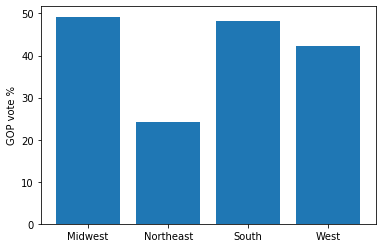

In [59]:
# With this, you can run a simple analysis:

grp = df.groupby(by='region')
sums = grp.sum()
plt.bar(sums.index,100 * sums.gop_2016_votes / sums.totalvotes_2016)
_ = plt.ylabel('GOP vote %')

## Manufacturing DataFrames

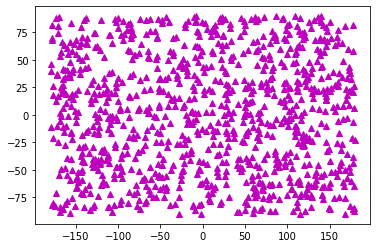

In [60]:
# Sometimes it's nice to be able to make a dataframe for testing:

n = 1000

y = 180*np.random.rand(n) - 90    # latitude?
x = 360*np.random.rand(n) - 180   # longitude? 
df = pd.DataFrame(data={'latitude':y,'longitude':x})
plt.plot(df.longitude,df.latitude,'m^')